In [25]:
# Briann Steven Gómez - Grupo 77 - Análisis de datos
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 1. Análisis exploratorio de los datos

In [27]:
# Cargar datos
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
data.shape

(1599, 12)

In [29]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [30]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 37., 515., 323., 257., 232., 119.,  87.,  21.,   7.,   1.]),
 array([ 8.4 ,  9.05,  9.7 , 10.35, 11.  , 11.65, 12.3 , 12.95, 13.6 ,
        14.25, 14.9 ]),
 <BarContainer object of 10 artists>)

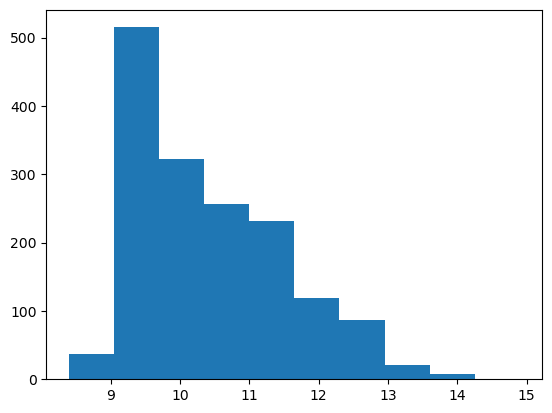

In [34]:
plt.hist(data.alcohol)

## 2. Preprocesamiento de datos

<Axes: xlabel='residual sugar', ylabel='quality'>

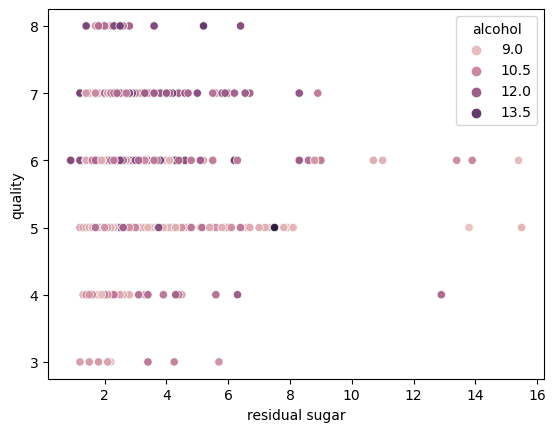

In [36]:
sns.scatterplot(x = "residual sugar", y = "quality", hue = "alcohol", data = data)

## 3. Características más relevantes

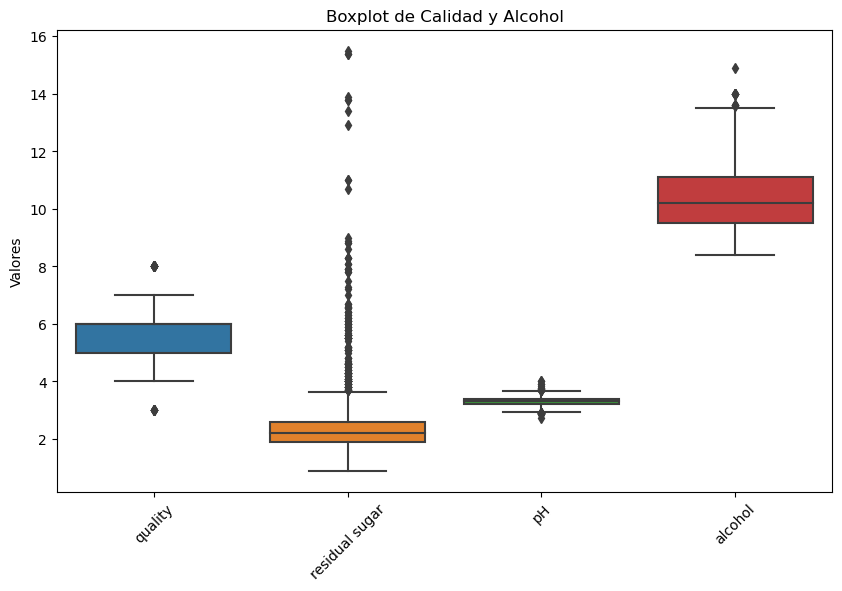

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['quality', 'residual sugar', 'pH', 'alcohol']])
plt.xticks(rotation=45)
plt.title('Boxplot de Calidad y Alcohol')
plt.ylabel('Valores')
plt.show()

## 4. Entrenar el modelo

In [40]:
predictors_col = ["quality", "residual sugar", "pH", "alcohol"]
target_col = ['quality']

In [41]:
predictors = data[predictors_col]
target = data[target_col]

In [42]:
predictors

,quality,residual sugar,pH,alcohol
0,5,1.9,3.51,9.4
1,5,2.6,3.20,9.8
2,5,2.3,3.26,9.8
3,6,1.9,3.16,9.8
4,5,1.9,3.51,9.4
...,...,...,...,...
1594,5,2.0,3.45,10.5
1595,6,2.2,3.52,11.2
1596,6,2.3,3.42,11.0
1597,5,2.0,3.57,10.2


In [43]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


## 5. Evaluar el desempeño del modelo

In [44]:
corr = predictors.corr()
corr

,quality,residual sugar,pH,alcohol
quality,1.000000,0.013732,-0.057731,0.476166
residual sugar,0.013732,1.000000,-0.085652,0.042075
pH,-0.057731,-0.085652,1.000000,0.205633
alcohol,0.476166,0.042075,0.205633,1.000000


## 6. Gráficos de resultados

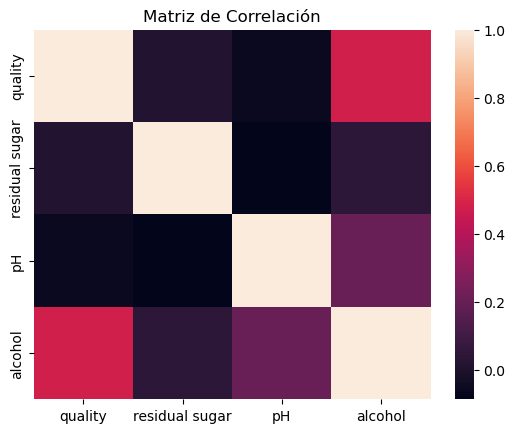

In [45]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.1, random_state=200)

In [47]:
tree = DecisionTreeClassifier()

In [48]:
arbol = tree.fit(X_train, y_train)

[Text(0.5, 0.875, 'x[0] <= 5.5\ngini = 0.644\nsamples = 1439\nvalue = [10, 45, 608, 576, 183, 17]'),
 Text(0.3, 0.625, 'x[0] <= 4.5\ngini = 0.154\nsamples = 663\nvalue = [10, 45, 608, 0, 0, 0]'),
 Text(0.2, 0.375, 'x[0] <= 3.5\ngini = 0.298\nsamples = 55\nvalue = [10, 45, 0, 0, 0, 0]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0, 0, 0]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 45\nvalue = [0, 45, 0, 0, 0, 0]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 608\nvalue = [0, 0, 608, 0, 0, 0]'),
 Text(0.7, 0.625, 'x[0] <= 6.5\ngini = 0.393\nsamples = 776\nvalue = [0, 0, 0, 576, 183, 17]'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 576\nvalue = [0, 0, 0, 576, 0, 0]'),
 Text(0.8, 0.375, 'x[0] <= 7.5\ngini = 0.156\nsamples = 200\nvalue = [0, 0, 0, 0, 183, 17]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 183\nvalue = [0, 0, 0, 0, 183, 0]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 17\nvalue = [0, 0, 0, 0, 0, 17]')]

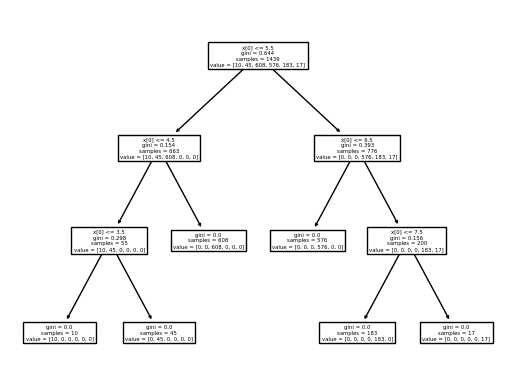

In [49]:
plot_tree(arbol)

In [50]:
predicciones = arbol.predict(X_test)

In [51]:
predicciones

array([7, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 7, 6, 5,
       6, 6, 5, 7, 6, 6, 6, 6, 5, 5, 7, 5, 4, 7, 6, 5, 7, 5, 6, 6, 5, 5,
       5, 6, 5, 5, 6, 4, 5, 6, 6, 7, 8, 7, 5, 4, 6, 5, 5, 5, 5, 5, 7, 6,
       7, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 4, 6, 5, 6,
       5, 6, 5, 6, 4, 5, 5, 6, 7, 4, 7, 5, 5, 7, 6, 7, 4, 5, 6, 6, 4, 5,
       5, 5, 7, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5,
       6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 7, 6, 5, 6, 6, 5, 5,
       5, 5, 6, 5, 5, 6])

In [52]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,4,5,6,7,8
Actual,,,,,
4,8,0,0,0,0
5,0,73,0,0,0
6,0,0,62,0,0
7,0,0,0,16,0
8,0,0,0,0,1


In [53]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

1.0

In [54]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

1.0

In [55]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

1.0

In [56]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

1.0

## 7. Interpretación de resultados

- Los resultados del árbol de decisión son excelentes, con precisión, precisión positiva, sensibilidad y medida F1 de 1.0. Sin embargo, es posible que el modelo se haya sobreajustado al conjunto de datos o que éste esté desequilibrado.

- Se recomienda realizar una validación cruzada y analizar las características para asegurarse de que el modelo sea robusto y generalizable. También es conveniente comparar con otros modelos para asegurarse de que el árbol de decisión sea la mejor opción.